# Random Forest Classification Implementation

"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [372]:
df_main = pd.read_csv("Travel.csv")
df = df_main
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning
1. Handling Missing Values
2. Handling Duplicates
3. Check Data Type
4. Understand the dataset

In [373]:
df.shape

(4888, 20)

In [374]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [375]:
# Drop duplicates
df.drop_duplicates(subset='CustomerID', inplace=True)
df.shape

(4888, 20)

In [376]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

### Check all the Categories for missing or incorrect values

In [377]:
df['TypeofContact'].unique()
# need to clean this

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

In [378]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [379]:
df['Occupation'].unique()

array(['Salaried', 'Free Lancer', 'Small Business', 'Large Business'],
      dtype=object)

In [380]:
df['Gender'].unique()
# need to impute this

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [381]:
df['ProductPitched'].unique()

array(['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

In [382]:
df['MaritalStatus'].unique()
# we can replace single with unmarried

array(['Single', 'Divorced', 'Married', 'Unmarried'], dtype=object)

In [383]:
df['Designation'].unique()

array(['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

In [384]:
df['Gender'] = df['Gender'].replace("Fe Male", "Female")
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [385]:
df['MaritalStatus'] = df['MaritalStatus'].replace("Single", "Unmarried")
df['MaritalStatus'].unique()

array(['Unmarried', 'Divorced', 'Married'], dtype=object)

In [386]:
## Check missing Values
features_with_na = [features for features in df.columns if df[features].isnull().sum() >=1]
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


#### Above we can interpreate that mean and 50% percentile is not having much of difference for all the features and hence we can use the mean Imputation for all the features with Int or float data type

## Imputing Null Values

1. Impute median value for number columns
2. Impute mode for Categorical Columns
3. Impute mode for Features with Discrete Values (Ex: NumberOfFollowups, PreferredPropertyStar)

In [387]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)

df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace=True)

df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)

df['NumberOfTrips'].fillna(df['NumberOfTrips'].mode()[0], inplace=True)

df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)

df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

# updating nan for TypeofContact
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)

df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## Feature Engineering

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [389]:
# dropping customer id
df.drop('CustomerID', axis=1, inplace=True)

#### Feature Extraction

In [390]:
# create new column for NumberOfPersonVisiting and NumberOfChildrenVisiting as TotalVisiting

In [391]:
df['TotalVisitng'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=["NumberOfPersonVisiting", "NumberOfChildrenVisiting"], inplace=True, axis=1)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisitng
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [392]:
# Get all numeric Feature
num_features = [features for features in df.columns if df[features].dtype != 'O']
num_features

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalVisitng']

In [393]:
# Categorical Features
categ_features = [features for features in df.columns if df[features].dtype == 'O']
categ_features

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [394]:
# Get numerical Discrete Features
discrete_features = [features for features in num_features if len(df[features].unique()) <=25]
discrete_features

['ProdTaken',
 'CityTier',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'TotalVisitng']

In [395]:
# Get numerical continuous Features
continuous_features = [features for features in num_features if len(df[features].unique()) >25]
continuous_features

['Age', 'DurationOfPitch', 'MonthlyIncome']

## Train Test Split (With Feature Engineering)

In [396]:
df.shape

(4888, 18)

In [397]:
#Create dependent and Independent feature
X = df.drop('ProdTaken', axis=1)
Y = df['ProdTaken']
X.shape

(4888, 17)

In [398]:
Y.value_counts()
# we can say there is imbalanced datset , but Random forest can work better with the imbalanced datsets.

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [399]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Columns in X_train:", list(X_train.columns))
print("Columns in X_test:", list(X_test.columns))

X_train shape: (3421, 17)
X_test shape: (1467, 17)
Columns in X_train: ['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome', 'TotalVisitng']
Columns in X_test: ['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome', 'TotalVisitng']


#### Create Column Transformer - This helps Transform the Features with multiple Econders like OneHotEncoder and StandardScale

In [400]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical features
categ_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

# Define transformers
std_transformer = StandardScaler()
ohe_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Create column transformer
preprocessor = ColumnTransformer([
    ("OneHotEncoder", ohe_transformer, categ_features),
    ("StandardScaler", std_transformer, num_features)
])

# Fit on training data and transform both training and testing data
X_train = preprocessor.fit_transform(X_train)  # Fit & Transform on Train Data
X_test = preprocessor.transform(X_test)        # Only Transform Test Data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (3421, 26)
X_test shape: (1467, 26)


In [401]:
## how the data looks like after apllying transformation
# pd.DataFrame(X_train).head()

In [402]:
X_train.shape

(3421, 26)

In [403]:
X_test.shape

(1467, 26)

## Model Training - Random Forest Classifier Training

In [404]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [405]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Descision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}
for model_name, model in models.items():
    print(f"\n===== {model_name} =====")
    
    # Train model
    model.fit(X_train, Y_train)
    
    # Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Training Scores
    print("Training Scores:")
    print(f"  Accuracy: {accuracy_score(Y_train, Y_train_pred):.4f}")
    print(f"  Precision: {precision_score(Y_train, Y_train_pred, average='weighted'):.4f}")
    print(f"  Recall: {recall_score(Y_train, Y_train_pred, average='weighted'):.4f}")
    print(f"  F1 Score: {f1_score(Y_train, Y_train_pred, average='weighted'):.4f}")
    
    # Test Scores
    print("Test Scores:")
    print(f"  Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
    print(f"  Precision: {precision_score(Y_test, Y_test_pred, average='weighted'):.4f}")
    print(f"  Recall: {recall_score(Y_test, Y_test_pred, average='weighted'):.4f}")
    print(f"  F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")
    
    # Confusion Matrix & Classification Report
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, Y_test_pred))
    print("Classification Report:")
    print(classification_report(Y_test, Y_test_pred))


===== Logistic Regression =====
Training Scores:
  Accuracy: 0.8451
  Precision: 0.8292
  Recall: 0.8451
  F1 Score: 0.8188
Test Scores:
  Accuracy: 0.8425
  Precision: 0.8235
  Recall: 0.8425
  F1 Score: 0.8182
Confusion Matrix:
[[1151   42]
 [ 189   85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1193
           1       0.67      0.31      0.42       274

    accuracy                           0.84      1467
   macro avg       0.76      0.64      0.67      1467
weighted avg       0.82      0.84      0.82      1467


===== Descision Tree =====
Training Scores:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
Test Scores:
  Accuracy: 0.9066
  Precision: 0.9062
  Recall: 0.9066
  F1 Score: 0.9064
Confusion Matrix:
[[1126   67]
 [  70  204]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1193
       

## Hyperparamter Tuning using RandomizeSearchCv

In [410]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    "max_depth":[5,8,15,None,10],
    "max_features": [5,7, 'auto', 8],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000]
}
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [411]:
random_cv_models = [
    ("RF", RandomForestClassifier(), rf_params)
    # similarly we can use different models with (name, models, params for models)
]
model_param = {}

for name, model, params in random_cv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=3, verbose=2, n_jobs=-1)
    random.fit(X_train, Y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"----------Best Params for {model_name}--------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
----------Best Params for RF--------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


### Now again train this model using RandomForestClassifier and check the score


===== Random Forest =====
Training Scores:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
Test Scores:
  Accuracy: 0.9271
  Precision: 0.9274
  Recall: 0.9271
  F1 Score: 0.9219
Confusion Matrix:
[[1180   13]
 [  94  180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1193
           1       0.93      0.66      0.77       274

    accuracy                           0.93      1467
   macro avg       0.93      0.82      0.86      1467
weighted avg       0.93      0.93      0.92      1467



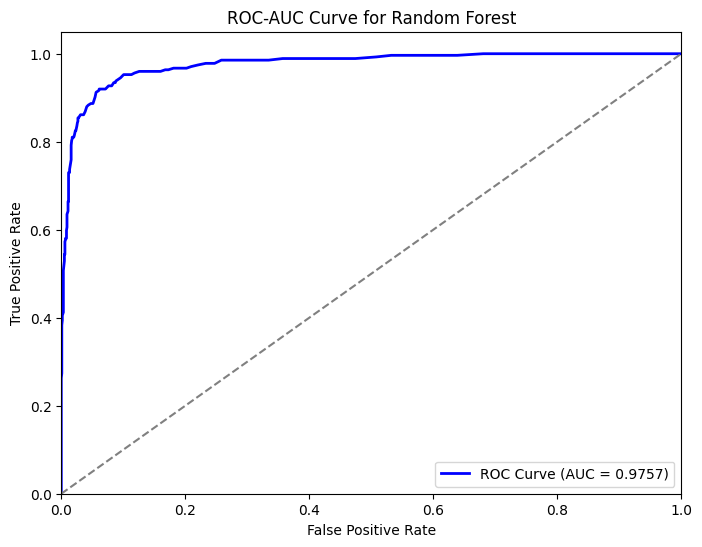

In [418]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features=7, max_depth=None)
}

best_model = None
best_Y_test_prob = None  # To store probabilities of the best model

for model_name, model in models.items():
    print(f"\n===== {model_name} =====")
    
    # Train model
    model.fit(X_train, Y_train)
    
    # Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Probability Scores (for ROC-AUC)
    Y_test_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
    
    # Save the first model (or later modify this logic to store the best model)
    if best_Y_test_prob is None:
        best_model = model
        best_Y_test_prob = Y_test_prob

    # Training Scores
    print("Training Scores:")
    print(f"  Accuracy: {accuracy_score(Y_train, Y_train_pred):.4f}")
    print(f"  Precision: {precision_score(Y_train, Y_train_pred, average='weighted'):.4f}")
    print(f"  Recall: {recall_score(Y_train, Y_train_pred, average='weighted'):.4f}")
    print(f"  F1 Score: {f1_score(Y_train, Y_train_pred, average='weighted'):.4f}")
    
    # Test Scores
    print("Test Scores:")
    print(f"  Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
    print(f"  Precision: {precision_score(Y_test, Y_test_pred, average='weighted'):.4f}")
    print(f"  Recall: {recall_score(Y_test, Y_test_pred, average='weighted'):.4f}")
    print(f"  F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")
    
    # Confusion Matrix & Classification Report
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, Y_test_pred))
    print("Classification Report:")
    print(classification_report(Y_test, Y_test_pred))

# Plot ROC-AUC Curve **outside** the loop using stored best model probabilities
if best_Y_test_prob is not None:
    fpr, tpr, _ = roc_curve(Y_test, best_Y_test_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Random classifier line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-AUC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.show()


### **Interpretation of the ROC-AUC Curve**

1. **ROC Curve Analysis:**
   - The **blue curve** represents the performance of the **Random Forest** classifier.
   - The **x-axis (False Positive Rate - FPR)** represents the proportion of incorrectly classified negative instances.
   - The **y-axis (True Positive Rate - TPR)** represents the proportion of correctly classified positive instances.
   - The **dashed diagonal line** represents the baseline of a random classifier (AUC = 0.5), meaning no predictive power.

2. **AUC Score (0.9757):**
   - The **Area Under the Curve (AUC) = 0.9757**, which is **very close to 1.0**.
   - This indicates that the model has an **excellent ability** to distinguish between positive and negative classes.
   - AUC values are interpreted as follows:
     - **0.90 – 1.00** → Excellent
     - **0.80 – 0.90** → Good
     - **0.70 – 0.80** → Fair
     - **0.60 – 0.70** → Poor
     - **0.50 – 0.60** → No better than random guessing

3. **Model Performance:**
   - Since AUC = **0.9757**, the **Random Forest model is performing extremely well** in classification.
   - It **minimizes false positives** while **maximizing true positives**.
   - The curve being **close to the top-left corner** suggests a **strong classifier with low error rates**.

The **dashed diagonal line** in the ROC curve represents the **performance of a random classifier**, meaning a model that makes **predictions purely by chance**. This corresponds to an **AUC = 0.5**, which means the model has **no discrimination power** between the positive and negative classes.  

### **Understanding Why AUC = 0.5 Means No Predictive Power**
1. **What Does This Mean?**
   - If your model’s ROC curve follows this diagonal line, it indicates **it is not learning any meaningful patterns from the data**.
   - In other words, its predictions are equivalent to making **random choices** rather than using actual data-driven insights.

2. **Comparison with a Good Model (AUC > 0.5):**
   - A well-performing model has an ROC curve that **bows toward the top-left corner**, maximizing TPR while minimizing FPR.
   - Higher AUC values (closer to **1.0**) indicate **better discriminatory ability**.